# The one about expectation maximization

In [6]:
import random
import numpy as np                              # import numpy
from numpy.linalg import inv                    # for matrix inverse
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework
!pip install scipy
from scipy.stats import multivariate_normal     # for generating pdf

In [110]:
m1 = [2, 5]      # consider a random mean and covariance value
m2 = [10, 5]
m3 = [8, 0]

cov1 = [[4, 7],
        [1, 0]]

cov2 = [[-2, 1], 
        [-1, 0]]

cov3 = [[0.5, 0], 
        [0, -0.5]]

np.random.seed(42)

A = np.random.multivariate_normal(m1, cov1, size=(200,))  # Generating 200 samples for each mean and covariance
B = np.random.multivariate_normal(m2, cov2, size=(100,))
C = np.random.multivariate_normal(m3, cov3, size=(50,))

X = np.concatenate((A, B, C), axis=0)

C:\Users\adev9\AppData\Local\Temp\ipykernel_18724\2891083264.py:16: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  A = np.random.multivariate_normal(m1, cov1, size=(200,))  # Generating 200 samples for each mean and covariance
C:\Users\adev9\AppData\Local\Temp\ipykernel_18724\2891083264.py:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  B = np.random.multivariate_normal(m2, cov2, size=(100,))
C:\Users\adev9\AppData\Local\Temp\ipykernel_18724\2891083264.py:18: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  C = np.random.multivariate_normal(m3, cov3, size=(50,))


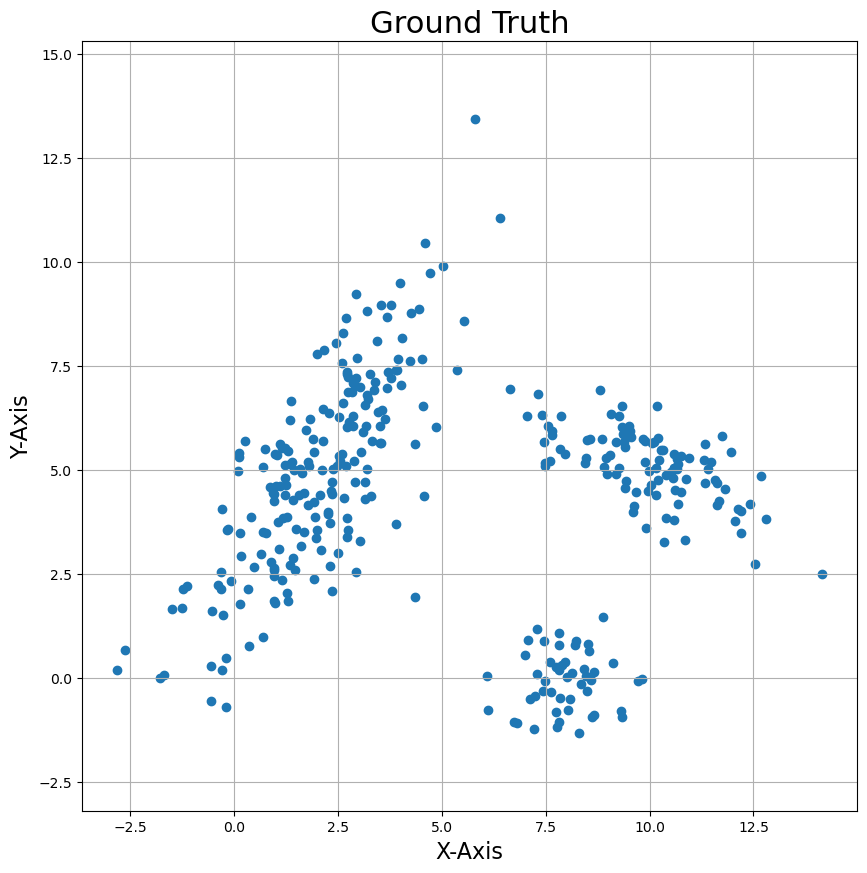

In [111]:
plt.figure(figsize=(10,10))                                 
plt.scatter(X[:,0], X[:,1], marker='o')     
plt.axis('equal')                                  
plt.xlabel('X-Axis', fontsize=16)              
plt.ylabel('Y-Axis', fontsize=16)                     
plt.title('Ground Truth', fontsize=22)    
plt.grid()            
plt.show()

In [112]:
def expectation_maximization(X):
    # Step 0: Initialize
    means, covariances, weights = initialize_parameters(data)

    for i in range(iterations + 1):

        # Step 1: Expectation
        y = expectation_step(X, means, covariances, weights)  # Computes clusters using posterior probabilities P(Ci|Xj)

        # Step 2: Maximisation
        means, covariances, weights = maximization_step(X, y)

    return means, covariances, weights

In [118]:
def initialize_parameters(X, num_clusters):
    means = X[np.random.choice(X.shape[0], num_clusters, replace=False)]  # Select 'num_clusters' data samples as initial centroids
    covariances = [np.eye(X.shape[1]) for _ in range(num_clusters)]  # Initialize covarianze
    weights = np.ones(num_clusters) / num_clusters  # Initialize weights (used for?)
    return means, covariances, weights

def multivariate_gaussian(x, mean, covariance):
    exponent = -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(covariance)), (x - mean))
    return (1 / np.sqrt((2 * np.pi) ** len(mean) * np.linalg.det(covariance))) * np.exp(exponent)

def expectation_step(X, means, covariances, weights):
    posterior_probabilities = np.zeros((len(X), len(means)))  # Place holder

    for i in range(len(X)):  # For each data point ...
        for j in range(len(means)):  # ... calculate the posterior probability for each cluster
            posterior_probabilities[i, j] = weights[j] * multivariate_gaussian(X[i], means[j], covariances[j])

        posterior_probabilities[i, :] /= np.sum(posterior_probabilities[i, :])  # Normalize probabilities? Softmax?

    # return np.argmax(posterior_probabilities, axis=1)  # Return cluster index as cluster label
    return posterior_probabilities

def maximization_step(X, y):
    num_clusters = y.shape[1]
    num_data = X.shape[0]
    
    weights = np.sum(y, axis=0) / num_data
    means = np.dot(y.T, X) / np.sum(y, axis=0)[:, np.newaxis]
    covariances = []

    for j in range(num_clusters):
        covariance = np.zeros((X.shape[1], X.shape[1]))

        # sum : (X[i][j] - means[i])(X[i][j] - means[i])(X[i][j] - means[i])
        # / (N - 1)
        
        for i in range(num_data):
            diff = (X[i] - means[j])[:, np.newaxis]
            covariance += y[i, j] * np.dot(diff, diff.T)

        covariance /= np.sum(y[:, j])
        covariances.append(covariance)

    return means, covariances, weights


In [119]:
means, covariances, weights = initialize_parameters(X, num_clusters=3)
y = expectation_step(X, means, covariances, weights)
y

array([[3.28304811e-18, 1.95941304e-15, 1.00000000e+00],
       [9.75149421e-15, 9.31044736e-12, 1.00000000e+00],
       [6.46203242e-15, 3.45476939e-13, 1.00000000e+00],
       ...,
       [3.46599203e-03, 9.96533992e-01, 1.62818917e-08],
       [5.99149765e-03, 9.94008406e-01, 9.60185270e-08],
       [3.65218971e-03, 9.96347807e-01, 3.11834655e-09]])

### Medium article

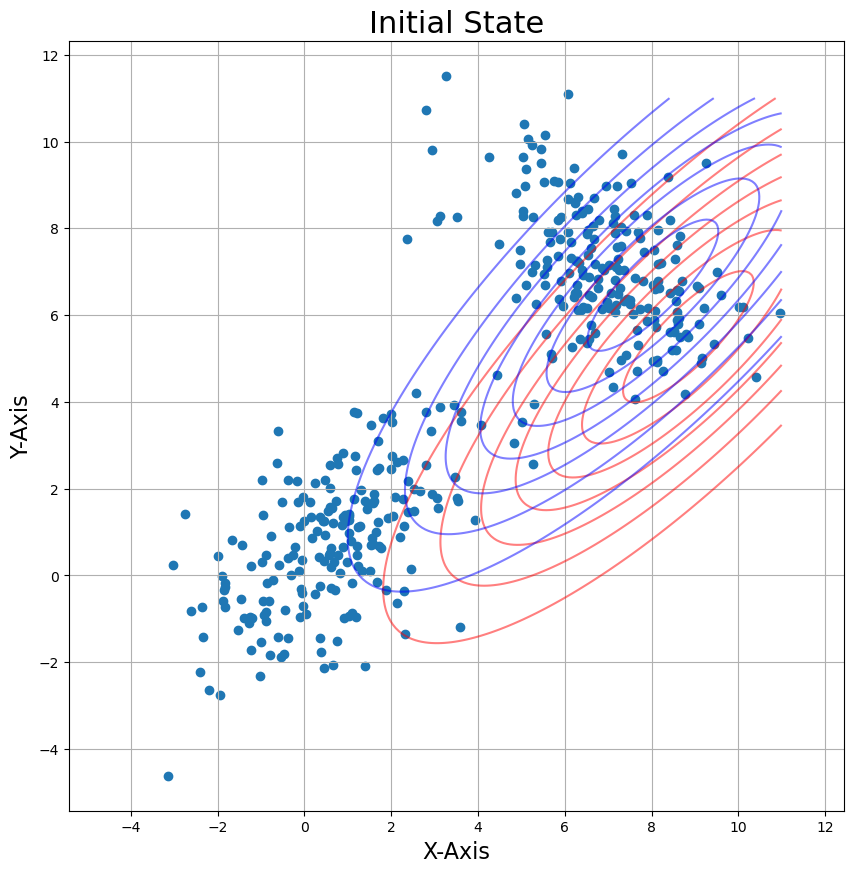

In [10]:
x1 = np.linspace(-4,11,200)  
x2 = np.linspace(-4,11,200)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(m1, cov1)  
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
plt.scatter(d[:,0], d[:,1], marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Initial State', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()

In [11]:
##Expectation step
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]
    
    pt2 = multivariate_normal.pdf(d, mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(d, mean=m1, cov=cov1)
    w1 = pi * pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)

    return(eval1)

In [12]:
## Maximization step
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(d)):
        num_mu1 += (1-eval1[i]) * d[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * d[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(d)):

        q1 = np.matrix(d[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(d[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(eval1)/len(d)
    
    lis2=[mu1,mu2,s1,s2,pi]
    return(lis2)

In [13]:
def plot(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    s1=lis1[2]
    s2=lis1[3]
    Z1 = multivariate_normal(mu1, s1)  
    Z2 = multivariate_normal(mu2, s2)

    pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
    plt.scatter(d[:,0], d[:,1], marker='o')     
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
    plt.axis('equal')                                                                  # making both the axis equal
    plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
    plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
    plt.grid()                                                                         # displaying gridlines
    plt.show()


In [18]:
# iterations = 20
# lis1=[m1,m2,cov1,cov2,pi]
# for i in range(0,iterations):
#     lis2 = Mstep(Estep(lis1))
#     # lis1=lis2
#     if(i==0 or i == 4 or i == 9 or i == 14 or i == 19):
#         plot(lis1)

## Chat

In [96]:
import numpy as np

def initialize_parameters(data, num_clusters):
    # Randomly initialize means and covariances
    np.random.seed(42)
    means = data[np.random.choice(len(data), num_clusters, replace=False)]
    covariances = [np.eye(data.shape[1]) for _ in range(num_clusters)]
    weights = np.ones(num_clusters) / num_clusters
    return means, covariances, weights

def multivariate_gaussian(x, mean, covariance):
    # Calculate the probability density of a multivariate Gaussian distribution
    exponent = -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(covariance)), (x - mean))
    return (1 / np.sqrt((2 * np.pi) ** len(mean) * np.linalg.det(covariance))) * np.exp(exponent)

def expectation_step(data, means, covariances, weights):
    # E-step: Compute the responsibilities
    responsibilities = np.zeros((len(data), len(means)))

    for i in range(len(data)):
        for j in range(len(means)):
            responsibilities[i, j] = weights[j] * multivariate_gaussian(data[i], means[j], covariances[j])

        responsibilities[i, :] /= np.sum(responsibilities[i, :])

    return responsibilities

def maximization_step(data, responsibilities):
    # M-step: Update means, covariances, and weights
    num_clusters = responsibilities.shape[1]
    num_data = len(data)
    weights = np.sum(responsibilities, axis=0) / num_data
    means = np.dot(responsibilities.T, data) / np.sum(responsibilities, axis=0)[:, np.newaxis]
    
    covariances = []

    for j in range(num_clusters):
        covariance = np.zeros((data.shape[1], data.shape[1]))

        for i in range(num_data):
            diff = (data[i] - means[j])[:, np.newaxis]
            covariance += responsibilities[i, j] * np.dot(diff, diff.T)

        covariance /= np.sum(responsibilities[:, j])
        covariances.append(covariance)

    return means, covariances, weights

def gaussian_mixture_model(data, num_clusters, num_iterations=100):
    means, covariances, weights = initialize_parameters(data, num_clusters)

    for _ in range(num_iterations):
        responsibilities = expectation_step(data, means, covariances, weights)
        means, covariances, weights = maximization_step(data, responsibilities)

    return means, covariances, weights

# Example usage:
# data is your high-dimensional dataset
# num_clusters is the number of clusters/components in the GMM
means, covariances, weights = gaussian_mixture_model(d, 3)
means, covariances, weights

(array([[ 2.02078534,  4.96516493],
        [ 9.9615142 ,  5.10402455],
        [ 7.96343895, -0.07054752]]),
 [array([[2.51529689, 2.88450456],
         [2.88450456, 5.65818732]]),
  array([[ 2.16209787, -0.82251223],
         [-0.82251223,  0.75836081]]),
  array([[0.6269767 , 0.03742322],
         [0.03742322, 0.49511564]])],
 array([0.57115081, 0.2859898 , 0.14285939]))